In [1]:
import numpy as np
import cv2,os
import matplotlib.pyplot as plt

In [2]:
data_dir = "./efficiency_datas"
cam_H, cam_W = 580, 890
wvls = np.array([430, 450, 480, 500, 520, 550, 580, 600, 620, 650, 660])
size = 20

### images captured for each wavelengths

In [3]:
# wvl images
wvl_imgs = np.zeros(shape=(len(wvls), cam_H, cam_W, 3))

for w in range(len(wvls)):
    wvl_img = cv2.imread(os.path.join(data_dir, '%dnm/capture_0000.png'%wvls[w]))[:,:,::-1]/255.
    wvl_imgs[w] = wvl_img

#### first order center points

In [4]:
first_center_pts = np.array(([[448, 318],[433, 319],[408,316], [388, 316], [370, 313],[345, 313], [316, 310], [301, 310],[280, 310], [253, 310], [247, 307]]))
zero_pts = np.array([822, 333])

#### Visualization

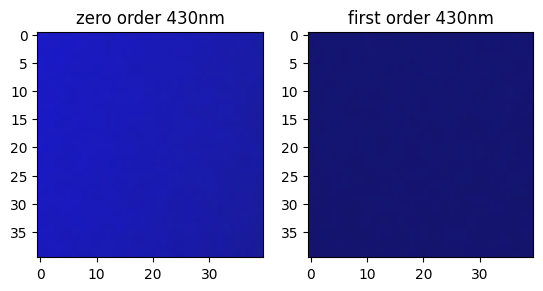

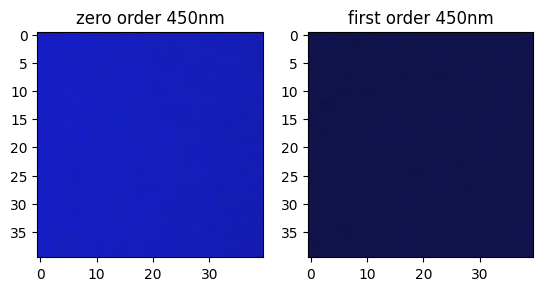

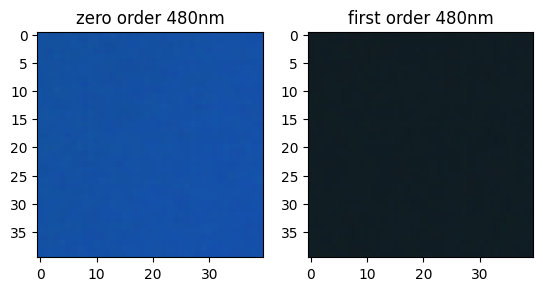

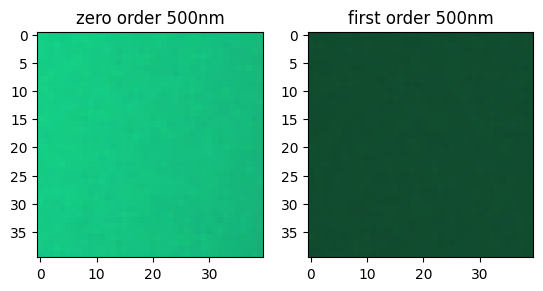

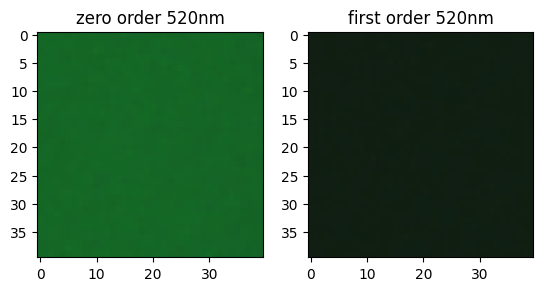

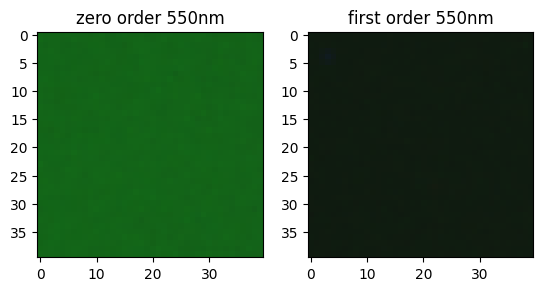

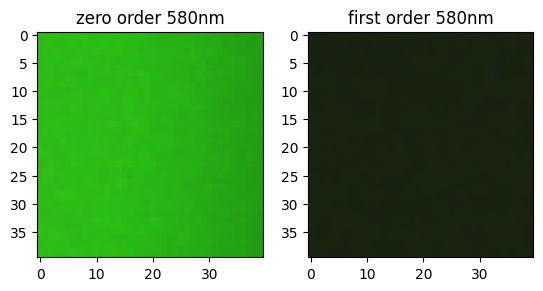

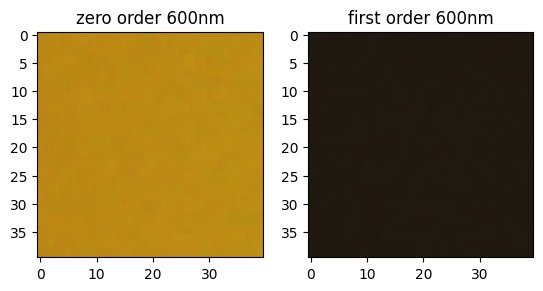

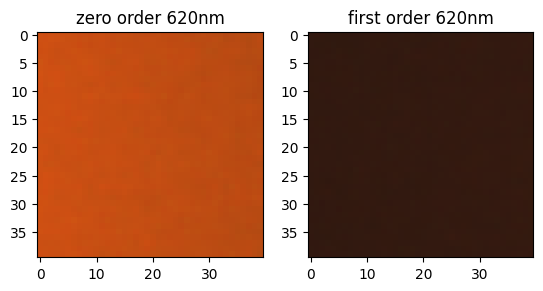

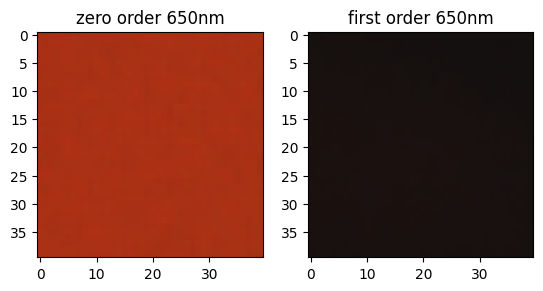

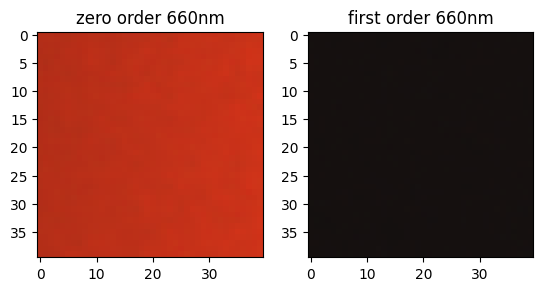

In [5]:
for w in range(len(wvls)):
    plt.figure()
    plt.subplot(121), plt.imshow(wvl_imgs[w, zero_pts[1]-size:zero_pts[1]+size, zero_pts[0]-size : zero_pts[0]+size]), plt.title("zero order %dnm"%wvls[w])
    plt.subplot(122), plt.imshow(wvl_imgs[w, first_center_pts[w,1]-size:first_center_pts[w,1]+size, first_center_pts[w,0]-size : first_center_pts[w,0]+size]), plt.title("first order %dnm"%wvls[w])

In [6]:
first_order_intensity = np.zeros(shape = (len(wvls), 3))
zero_order_intensity = np.zeros(shape = (len(wvls), 3))

for w in range(len(wvls)):
    wvl_intensity_zero = wvl_imgs[w, zero_pts[1]-size:zero_pts[1]+size, zero_pts[0]-size : zero_pts[0]+size].reshape(-1, 3).mean(axis = 0)
    wvl_intensity_first = (wvl_imgs[w, first_center_pts[w,1]-size:first_center_pts[w,1]+size, first_center_pts[w,0]-size : first_center_pts[w,0]+size]).reshape(-1, 3).mean(axis = 0)
    
    first_order_intensity[w] = wvl_intensity_first
    zero_order_intensity[w] = wvl_intensity_zero
    

In [7]:
first_order_intensity*255.

array([[ 20.0125  ,  20.14625 , 112.418125],
       [ 16.674375,  19.06625 ,  75.318125],
       [ 15.70375 ,  28.769375,  34.785625],
       [ 16.795   ,  75.92625 ,  47.124375],
       [ 15.995625,  30.2825  ,  18.380625],
       [ 15.34875 ,  27.28625 ,  16.034375],
       [ 24.698125,  34.59375 ,  15.798125],
       [ 31.52875 ,  24.505625,  15.22875 ],
       [ 50.696875,  25.218125,  15.69    ],
       [ 23.79625 ,  16.730625,  15.165   ],
       [ 21.01625 ,  16.061875,  15.115   ]])

In [8]:
zero_order_intensity*255.

array([[ 25.6275  ,  26.40875 , 178.603125],
       [ 21.14125 ,  29.3525  , 187.9725  ],
       [ 20.01875 ,  80.491875, 165.074375],
       [ 20.9675  , 194.36875 , 128.43625 ],
       [ 20.2675  , 102.306875,  37.83375 ],
       [ 18.740625,  99.953125,  23.875   ],
       [ 40.190625, 179.3975  ,  21.035625],
       [187.5225  , 138.0925  ,  19.773125],
       [194.444375,  76.858125,  18.575   ],
       [169.4575  ,  48.583125,  20.17375 ],
       [191.633125,  48.268125,  24.41875 ]])

In [14]:
efficiency_RGB = (first_order_intensity*255.) / (zero_order_intensity*255.)

In [17]:
efficiency_RGB.shape

(11, 3)

In [18]:
diffraction_grating_effifciency = np.array([efficiency_RGB[0,2],efficiency_RGB[1,2],efficiency_RGB[2,2],efficiency_RGB[3,1],efficiency_RGB[4,1], efficiency_RGB[5,1],efficiency_RGB[6,1],efficiency_RGB[7,0],efficiency_RGB[8,0],efficiency_RGB[9,0],efficiency_RGB[10,0]])

In [19]:
diffraction_grating_effifciency

array([0.62942978, 0.40068694, 0.21072698, 0.39062992, 0.29599673,
       0.27299046, 0.19283295, 0.16813316, 0.26072688, 0.14042607,
       0.10966919])

### Diffraction Efficiency

### Interpolation

In [20]:
from scipy import interpolate
import torch

In [22]:
def cubic_interpolation(x_new, x_points, y_points, n):
    tck = interpolate.splrep(x_points, y_points, k=n)   # Estimate the polynomial of nth degree by using x_points and y_points
    y_new = interpolate.splev(x_new, tck)
    return y_new

In [49]:
wvls = torch.tensor([430, 450, 480, 500, 520, 550, 580, 600, 620, 650, 660])*1e-9
new_wvls = torch.linspace(420*1e-9, 660*1e-9, 25) # 400 ~ 680 까지 10nm 간격으로

intensity_dg = cubic_interpolation(new_wvls, wvls, diffraction_grating_effifciency, 4)

In [50]:
import matplotlib.pyplot as plt

(<AxesSubplot:title={'center':'order m = 1'}>,
 Text(0.5, 1.0, 'order m = 1'))

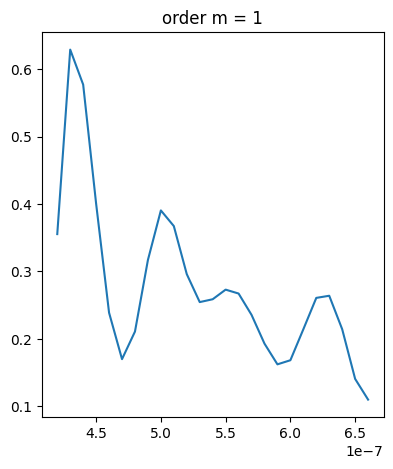

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(131), plt.plot(new_wvls, order1), plt.title('order m = 1')

In [53]:
np.save('./20230825_intensity_dg.npy',intensity_dg)

In [35]:
order1

array([0.35544702, 0.62942978, 0.57748573, 0.40068694, 0.23869405,
       0.16975989, 0.21072698, 0.31702889, 0.39062992, 0.36737236,
       0.29599636, 0.25448379, 0.2587102 , 0.27299046, 0.26719047,
       0.23554529, 0.19283295, 0.16204329, 0.16813332, 0.21410442,
       0.26072705, 0.2639029 , 0.21419597, 0.14042607, 0.10966932])

In [ ]:
import numpy as np

In [ ]:
intensity_dg = np.zeros(shape=(3,25))

In [ ]:
intensity_dg[1] = 1. 

In [ ]:
order1.shape

(25,)

In [ ]:
order1[2] = order1[2] * 0.7
order1[:3] = order1[:3] * 0.7
order1[4:-4] = order1[4:-4] * 0.55
order1[-3:] = order1[-3:] * 0.35
order1[-4] = order1[-4] * 0.2

In [ ]:
intensity_dg[0] = order1
intensity_dg[2] = order1

In [ ]:
np.save('./intensity_dg_0503.npy', intensity_dg)